# 과적합 피하기
---

# 0. Lib & Data

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import numpy
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv("../datasets/sonar.csv", header=None)

print(df.shape)
df.head(5)

(208, 61)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

---
# 1. 초기 모델링

## 1.1 X, Y(split, LE) - 1. 이후에도 계속 사용

X, Y_obj Split(slicing)

In [59]:
# Dataframe(df)는 iloc로 슬라이싱해서 Dataframe 반환
# df.values는 Dataframe을 array로 반환.
## array는 [:, 0:60]로 0~59열 슬라이싱 가능
dataset=df.values
X = dataset[:,:60]
X = np.asarray(X).astype(np.float32)
Y_obj = dataset[:, 60]
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]],
      dtype=float32)

Label Encoding

In [60]:
# Label 문자열 반환
le = LabelEncoder()
le.fit(Y_obj)
Y = le.transform(Y_obj)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 1.2 Modeling

모델 설정

In [61]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

모델 컴파일

In [64]:
model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

모델 실행

In [65]:
history = model.fit(X, Y, epochs=200, batch_size=5)

Epoch 1/200
42/42 [==============================] - 0s 849us/step - loss: 0.6829 - accuracy: 0.5577
Epoch 2/200
42/42 [==============================] - 0s 783us/step - loss: 0.6691 - accuracy: 0.7837
Epoch 3/200
42/42 [==============================] - 0s 762us/step - loss: 0.6541 - accuracy: 0.7548
Epoch 4/200
42/42 [==============================] - 0s 801us/step - loss: 0.6290 - accuracy: 0.7740
Epoch 5/200
42/42 [==============================] - 0s 769us/step - loss: 0.5993 - accuracy: 0.7788
Epoch 6/200
42/42 [==============================] - 0s 812us/step - loss: 0.5745 - accuracy: 0.7404
Epoch 7/200
42/42 [==============================] - 0s 710us/step - loss: 0.5412 - accuracy: 0.7885
Epoch 8/200
42/42 [==============================] - 0s 929us/step - loss: 0.5126 - accuracy: 0.7692
Epoch 9/200
42/42 [==============================] - 0s 791us/step - loss: 0.4999 - accuracy: 0.7596
Epoch 10/200
42/42 [==============================] - 0s 777us/step - loss: 0.4743 - accura

결과출력

In [67]:
print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

7/7 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000

 Accuracy: 1.0000


## 1.3 Plot

In [66]:
loss = history.history["loss"]
acc = history.history["accuracy"]

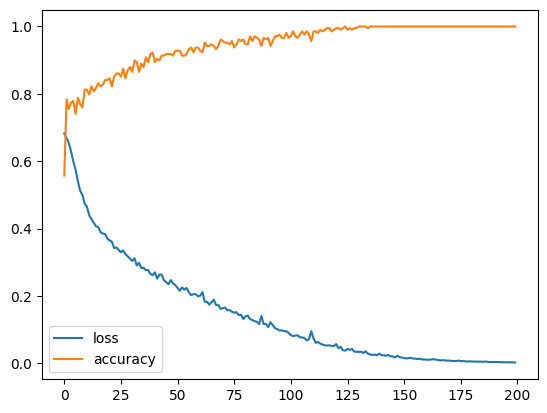

In [69]:
import matplotlib.pyplot as plt
plt.plot(loss, label="loss")
plt.plot(acc, label="accuracy")
plt.legend()
plt.show()

<img width="303" alt="image" src="https://user-images.githubusercontent.com/88031549/199865292-e5af6ce0-1563-4e1d-8037-584880321534.png">

---
# 2. 과적합 방지

## 2.1 은닉층 수로 과접합 방지

<img width="377" alt="image" src="https://user-images.githubusercontent.com/88031549/199865363-30660e13-848e-41f4-9502-694dc5f63333.png">

## 2.2 prameter 중 epoch으로 과접합 방지

In [74]:
from sklearn.model_selection import train_test_split
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=seed)

In [75]:
epochs_list = [50,100,130,150]
평가리스트 = []
for i in epochs_list:
    # 모델 설정
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics= ['accuracy'])

    history = model.fit(X_train, Y_train, epochs=i, batch_size=5)
    fit_acc = history.history["accuracy"][-1]
    acc = model.evaluate(X_test, Y_test)[1]
    result = fit_acc, acc
    
    평가리스트.append(result)

Epoch 1/50
29/29 [==============================] - 0s 872us/step - loss: 0.2575 - accuracy: 0.4000
Epoch 2/50
29/29 [==============================] - 0s 729us/step - loss: 0.2490 - accuracy: 0.5034
Epoch 3/50
29/29 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.5448
Epoch 4/50
29/29 [==============================] - 0s 676us/step - loss: 0.2435 - accuracy: 0.5793
Epoch 5/50
29/29 [==============================] - 0s 866us/step - loss: 0.2401 - accuracy: 0.6069
Epoch 6/50
29/29 [==============================] - 0s 687us/step - loss: 0.2344 - accuracy: 0.6897
Epoch 7/50
29/29 [==============================] - 0s 733us/step - loss: 0.2272 - accuracy: 0.7172
Epoch 8/50
29/29 [==============================] - 0s 730us/step - loss: 0.2212 - accuracy: 0.7241
Epoch 9/50
29/29 [==============================] - 0s 697us/step - loss: 0.2148 - accuracy: 0.7241
Epoch 10/50
29/29 [==============================] - 0s 785us/step - loss: 0.2111 - accuracy: 0.6897
E

In [76]:
평가리스트

[(0.8758620619773865, 0.761904776096344),
 (0.9931034445762634, 0.8571428656578064),
 (1.0, 0.8095238208770752),
 (1.0, 0.8095238208770752)]

> 위에서 epoch이 100일 때 test acc 기준으로 가장 높음  
> 이후에는 과적합되어 test acc가 낮아짐  
> -> epoch 100이 여기선 best

<img width="596" alt="image" src="https://user-images.githubusercontent.com/88031549/199867058-46c5af44-02fb-4044-b34b-8a963b0a0f06.png">

## 2.3 K-fold로 교차 검증  
위에서는 0.3만큼만 test set으로 사용

In [77]:
from sklearn.model_selection import StratifiedKFold

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [78]:
#빈 acc 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    # 모델 설정
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics= ['accuracy'])

    model.fit(X_train, Y_train, epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/100
29/29 [==============================] - 0s 777us/step - loss: 0.2473 - accuracy: 0.5448
Epoch 2/100
29/29 [==============================] - 0s 739us/step - loss: 0.2359 - accuracy: 0.6207
Epoch 3/100
29/29 [==============================] - 0s 804us/step - loss: 0.2310 - accuracy: 0.6138
Epoch 4/100
29/29 [==============================] - 0s 713us/step - loss: 0.2215 - accuracy: 0.6966
Epoch 5/100
29/29 [==============================] - 0s 749us/step - loss: 0.2130 - accuracy: 0.7241
Epoch 6/100
29/29 [==============================] - 0s 663us/step - loss: 0.2041 - accuracy: 0.7241
Epoch 7/100
29/29 [==============================] - 0s 716us/step - loss: 0.1952 - accuracy: 0.7241
Epoch 8/100
29/29 [==============================] - 0s 763us/step - loss: 0.1882 - accuracy: 0.7862
Epoch 9/100
29/29 [==============================] - 0s 702us/step - loss: 0.1809 - accuracy: 0.7586
Epoch 10/100
29/29 [==============================] - 0s 680us/step - loss: 0.1784 - accura

10번(n_fold)의 테스트 결과값 출력

In [79]:
print("\n %.f fold accuracy:" % n_fold, accuracy)


 10 fold accuracy: ['0.7619', '1.0000', '0.9524', '0.9524', '0.9524', '0.7619', '1.0000', '0.9048', '1.0000', '0.9000']


---
# 3. 실습 : Wine 데이터로 베스트 모델 만들기

## 3.1 Data

In [88]:
red_df = pd.read_csv("../datasets/winequality-red.csv", delimiter=";")
white_df = pd.read_csv("../datasets/winequality-white.csv", delimiter=";")
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Labeling(Red=1 / White=0) & concat

In [89]:
red_df['label'] = list(map(lambda x: 1, range(len(red_df))))
white_df['label'] = list(map(lambda x: 0, range(len(white_df))))

In [90]:
wine_df = pd.concat([red_df , white_df])
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## 3.2 Modeling

In [108]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics= ['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=5)


Epoch 1/100
29/29 [==============================] - 0s 752us/step - loss: 0.2492 - accuracy: 0.5379
Epoch 2/100
29/29 [==============================] - 0s 855us/step - loss: 0.2442 - accuracy: 0.5724
Epoch 3/100
29/29 [==============================] - 0s 750us/step - loss: 0.2408 - accuracy: 0.5586
Epoch 4/100
29/29 [==============================] - 0s 921us/step - loss: 0.2324 - accuracy: 0.6828
Epoch 5/100
29/29 [==============================] - 0s 719us/step - loss: 0.2239 - accuracy: 0.7103
Epoch 6/100
29/29 [==============================] - 0s 760us/step - loss: 0.2152 - accuracy: 0.7310
Epoch 7/100
29/29 [==============================] - 0s 709us/step - loss: 0.2052 - accuracy: 0.7034
Epoch 8/100
29/29 [==============================] - 0s 787us/step - loss: 0.1960 - accuracy: 0.7862
Epoch 9/100
29/29 [==============================] - 0s 881us/step - loss: 0.1865 - accuracy: 0.7310
Epoch 10/100
29/29 [==============================] - 0s 689us/step - loss: 0.1818 - accura

## 3.3 학습 도중 모델 저장 & 조기종료 (in 학습)
**-> 과적합 전의 모델을 사용할 수 있도록**

In [109]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

모델 저장 폴더 설정

In [110]:
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

모델 저장 조건 설정
> checkpointer : 모델 중간중간 저장  
> early_stopping_callback : loss변동이 없으면 조기종료  
> - patience가 100이라면 epoch이 100 돌아갈 동안 loss가 변동이 없다면 조기종료시켜준다.

In [112]:
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=100)

모델 실행 및 저장
> "collback"이란, 함수의 파라미터 안에 다시 함수를 입력할 떄

In [119]:
# callback o
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback ,checkpointer])

# callback x
# history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)
history

Epoch 1/3500
1/1 [==============================] - ETA: 0s - loss: 1.2656e-04 - accuracy: 1.0000
Epoch 1: val_loss did not improve from 0.00859
1/1 [==============================] - 0s 54ms/step - loss: 1.2656e-04 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.7391
Epoch 2/3500
1/1 [==============================] - ETA: 0s - loss: 1.2644e-04 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.00859
1/1 [==============================] - 0s 29ms/step - loss: 1.2644e-04 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.7391
Epoch 3/3500
1/1 [==============================] - ETA: 0s - loss: 1.2632e-04 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.00859
1/1 [==============================] - 0s 25ms/step - loss: 1.2632e-04 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.7391
Epoch 4/3500
1/1 [==============================] - ETA: 0s - loss: 1.2622e-04 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 0.00859
1/1 [===================

## 3.4 Plot : 정확도 & 오차

In [120]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

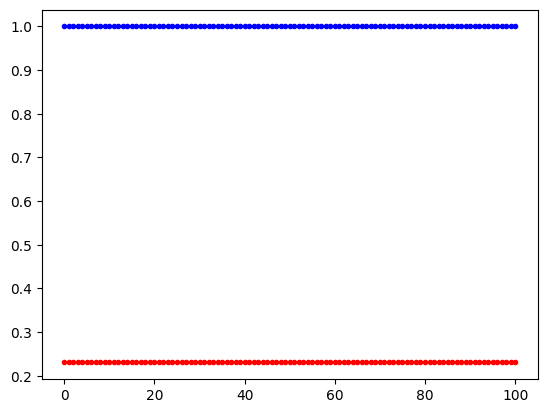

In [121]:
# 테스트셋으로 실험 결과의 오차값을 저장
y_vloss =history.history["val_loss"]

# 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history["accuracy"]

x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3) # 정확도 : 파랑
plt.plot(x_len, y_acc, "o", c="blue", markersize=3) # 오차 : 빨강

plt.show()


callback 없을 때

<img width="544" alt="image" src="https://user-images.githubusercontent.com/88031549/199889081-c3a03941-cfbd-4198-8d82-f4d52d716236.png">


끝!